In [2]:
!pip install tweepy praw pandas textblob matplotlib seaborn wordcloud


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 7.0 MB/s eta 0:00:00


In [3]:
pip install requests_oauthlib


In [ ]:
from requests_oauthlib import OAuth1Session

# Replace 'YOUR_CONSUMER_KEY' and 'YOUR_CONSUMER_SECRET' with your actual key and secret.
consumer_key = 'DUQTYZCQJAGKa6U46GApFVtFYDKDGLBKFyVYU7NHVedEmRKcgB'
consumer_secret = 'icnu3Tavz0SOZOJQjgwAEky5VmPFixBXercZLAtQWlJ3wVT3l9'

# Start the session
oauth = OAuth1Session(client_key=consumer_key, client_secret=consumer_secret)

# Tumblr request token URL
request_token_url = 'https://www.tumblr.com/oauth/request_token'

# Fetch the request token
try:
    fetch_response = oauth.fetch_request_token(request_token_url)
    resource_owner_key = fetch_response.get('oauth_token')
    resource_owner_secret = fetch_response.get('oauth_token_secret')
except ValueError:
    print("There was an error fetching the request token.")

print("OAuth Token: ", resource_owner_key)
print("OAuth Token Secret: ", resource_owner_secret)


OAuth Token:  rJ2Djhg4fNwoVA016tizuPleDnl9H1GfJUBwuq4MNG3NVY1Mdq
OAuth Token Secret:  YM7qwi1ZXVvxwxRrIl6DhrHPqnTPwoIEYH1xps4CqVeAqSd4cM


In [4]:
pip install pytumblr


In [36]:

import praw
import pytumblr
from textblob import TextBlob
import pandas as pd
import re
from google.colab import drive
import os
import json


# Define the correct path to the configuration file
drive.mount('/content/drive')
config_path = '/content/drive/My Drive/Colab Notebooks/Social_Media_Analysis/config.json'

# Load the configuration
with open(config_path, 'r') as config_file:
    config = json.load(config_file)

reddit = praw.Reddit(
    client_id=config['REDDIT_CLIENT_ID'],
    client_secret=config['REDDIT_CLIENT_SECRET'],
    user_agent=config['REDDIT_USER_AGENT']
)

# Set up Tumblr API with loaded credentials
tumblr = pytumblr.TumblrRestClient(
    config['TUMBLR_CONSUMER_KEY'],
    config['TUMBLR_CONSUMER_SECRET'],
    config['TUMBLR_OAUTH_TOKEN'],
    config['TUMBLR_OAUTH_SECRET']
)

# Function to fetch Reddit posts
def fetch_reddit_posts(subreddit, keyword, limit=1000):
    subreddit = reddit.subreddit(subreddit)
    posts = subreddit.search(keyword, limit=limit)
    data = []
    for post in posts:
        text = post.title + ' ' + post.selftext
        sentiment = TextBlob(text).sentiment.polarity
        data.append({'date': post.created_utc, 'text': text, 'sentiment': sentiment,'source':'Reddit'})
    return pd.DataFrame(data)

# Function to fetch Tumblr posts
def fetch_tumblr_posts(tag, limit=50):
    posts = tumblr.tagged(tag, limit=limit)
    data = []
    for post in posts:
        if 'body' in post:
            text = post['body']
        elif 'caption' in post:
            text = post['caption']
        else:
            text = post.get('text', '')
        sentiment = TextBlob(text).sentiment.polarity
        data.append({'date': post['date'], 'text': text, 'sentiment': sentiment,'source':'Tumblr'})
    return pd.DataFrame(data)

# Example usage
df_reddit = fetch_reddit_posts('all', 'good')
df_tumblr = fetch_tumblr_posts('good')

# Combine data from both platforms
df_combined = pd.concat([df_reddit, df_tumblr], ignore_index=True)
# or for a large dataset where unique might be too long
print(df_combined['date'].head(10))

def convert_dates(date):
    try:
        # Attempt to convert assuming the date is a UNIX timestamp
        return pd.to_datetime(date, unit='s')
    except ValueError:
        try:
            # Attempt to convert standard datetime strings
            # Remove ' GMT' and convert
            return pd.to_datetime(date.replace(' GMT', ''))
        except ValueError:
            # Log the failure or return NaT (Not a Time) if both conversions fail
            return pd.NaT

# Apply the conversion function to each date in the DataFrame
df_combined['date'] = df_combined['date'].apply(convert_dates)



It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



0    1709398210.0
1    1711692247.0
2    1699218044.0
3    1689767648.0
4    1680709543.0
5    1729138916.0
6    1730301037.0
7    1722347899.0
8    1731410797.0
9    1732711706.0
Name: date, dtype: object


<ipython-input-37-02a0b47ddad3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_combined, x='sentiment_rounded', palette='viridis')


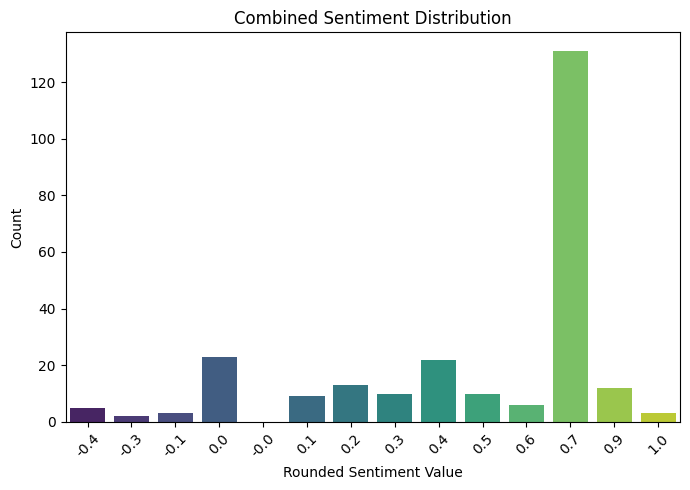

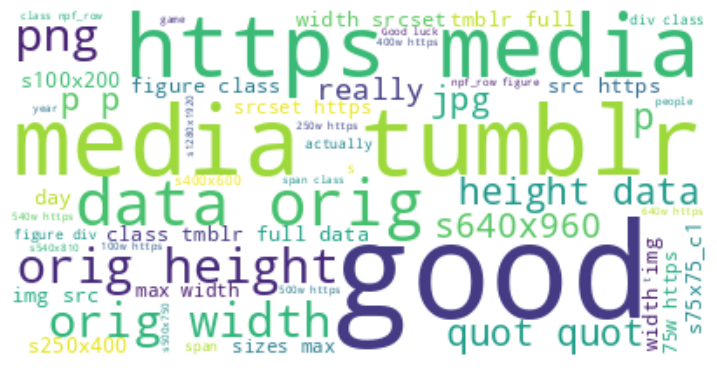

Current Working Directory: /content


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

"\ncsv_path = 'combined_sentiment_analysis.csv'\ndf_combined.to_csv(csv_path, index=False)\ndf = pd.read_csv(csv_path)\n\n# Display the first few rows to inspect the data\nprint(df.head())\n\n# Show a summary of the DataFrame to check for any issues with data types or missing values\nprint(df.info())\n"

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import os



df_combined['sentiment_rounded'] = df_combined['sentiment'].round(1)

plt.figure(figsize=(7, 5))  # Adjusted figure size for better visibility
sns.countplot(data=df_combined, x='sentiment_rounded', palette='viridis')
plt.title('Combined Sentiment Distribution')
plt.xlabel('Rounded Sentiment Value')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Adjust rotation to reduce overlap
plt.tight_layout()  # Ensure layout fits well without clipping
plt.show()


print("\n" * 2)
# Adjusted plot for word cloud
wordcloud = WordCloud(background_color='white').generate(' '.join(df_combined['text']))
plt.figure(figsize=(9, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Print current working directory
print("Current Working Directory:", os.getcwd())


# Save and conditionally download the CSV file
csv_path = 'combined_sentiment_analysis.csv'
df_combined.to_csv(csv_path, index=False)

wordcloud.to_file('/wordcloud.png')


# Try downloading the file if in Google Colab
try:
    from google.colab import files
    files.download(csv_path)
    #files.download('wordcloud.png')
except ImportError:
    print(f"Download manually: {os.path.join(os.getcwd(), csv_path)}")


# reading csv
"""
csv_path = 'combined_sentiment_analysis.csv'
df_combined.to_csv(csv_path, index=False)
df = pd.read_csv(csv_path)

# Display the first few rows to inspect the data
print(df.head())

# Show a summary of the DataFrame to check for any issues with data types or missing values
print(df.info())
"""
